<a href="https://colab.research.google.com/github/Shivanibotekar/Laxmi/blob/main/lris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/irs/IRIS.csv')
print(df.to_string())

     sepal_length  sepal_width  petal_length  petal_width          species
0             5.1          3.5           1.4          0.2      Iris-setosa
1             4.9          3.0           1.4          0.2      Iris-setosa
2             4.7          3.2           1.3          0.2      Iris-setosa
3             4.6          3.1           1.5          0.2      Iris-setosa
4             5.0          3.6           1.4          0.2      Iris-setosa
5             5.4          3.9           1.7          0.4      Iris-setosa
6             4.6          3.4           1.4          0.3      Iris-setosa
7             5.0          3.4           1.5          0.2      Iris-setosa
8             4.4          2.9           1.4          0.2      Iris-setosa
9             4.9          3.1           1.5          0.1      Iris-setosa
10            5.4          3.7           1.5          0.2      Iris-setosa
11            4.8          3.4           1.6          0.2      Iris-setosa
12            4.8        

First, we import the pandas library, which is essential for working with dataframes in Python. We use the alias `pd` for convenience, so we don't have to type `pandas` every time.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/irs/IRIS.csv')

Finally, we print the entire DataFrame `df` to the console using the `to_string()` method. This ensures that all rows and columns are displayed, rather than just a truncated view.

In [ ]:
new_df = df.dropna()
new_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = new_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = new_df['species']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print("Features (X) head:\n", X.head())
print("\nTarget (y) head (encoded):\n", y[:5])
print("\nEncoded classes:", le.classes_)

Features (X) head:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Target (y) head (encoded):
 [0 0 0 0 0]

Encoded classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Split the Data

### Subtask:
Divide the preprocessed dataset into training and testing sets to properly evaluate the model's performance on unseen data. A common split is 80% for training and 20% for testing.


**Reasoning**:
The subtask requires splitting the data into training and testing sets. I will use `train_test_split` from `sklearn.model_selection` to achieve this, adhering to the specified parameters.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Train a Classification Model

### Subtask:
Choose and train a suitable classification model, such as a K-Nearest Neighbors (K-NN) classifier, using the training data. This step involves fitting the model to learn the relationships between the features and the species.


**Reasoning**:
The subtask requires training a K-Nearest Neighbors (KNN) classification model. I will import `KNeighborsClassifier`, instantiate it with `n_neighbors=5`, and then fit the model to the training data (`X_train` and `y_train`).



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)

print("K-NN model trained successfully.")

K-NN model trained successfully.


**Reasoning**:
To evaluate the model's performance, I will make predictions on the test set using the trained KNN model, then calculate and print the accuracy score by comparing these predictions with the actual test labels.



In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


## Final Task

### Subtask:
Summarize the model's performance and provide any insights gained from the classification task.


## Summary:

### Q&A
The model's performance was exceptional, achieving an accuracy of 1.0000 (100%) on the test set.

### Data Analysis Key Findings
*   Features (sepal length, sepal width, petal length, petal width) were successfully separated into `X`, and the target variable (species) into `y`.
*   The target variable 'species' was successfully encoded into numerical labels: 'Iris-setosa' as 0, 'Iris-versicolor' as 1, and 'Iris-virginica' as 2.
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 120 samples for training and 30 for testing. This split maintained the original class proportions due to the use of `stratify=y`.
*   A K-Nearest Neighbors (K-NN) classification model was successfully trained using `n_neighbors=5` on the training data.
*   The trained K-NN model achieved a perfect accuracy score of 1.0000 (100%) on the unseen test data.

### Insights or Next Steps
*   The K-NN model demonstrates excellent performance on the Iris dataset, perfectly classifying all test samples. This high accuracy is typical for this well-separated dataset with simple classification algorithms.
*   While 100% accuracy is great, for more complex datasets, it would be beneficial to explore additional evaluation metrics (e.g., precision, recall, F1-score, confusion matrix) and cross-validation to ensure robustness and generalizability.


Introduction¶
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Task
## Explore Different Models

### Subtask:
Train and evaluate a Logistic Regression model on the Iris dataset to compare its performance against the K-NN model.

## Explore Different Models

### Subtask:
Train and evaluate a Logistic Regression model on the Iris dataset to compare its performance against the K-NN model.


```markdown
**Reasoning**:
As requested by the subtask, I will train and evaluate a Logistic Regression model. This involves importing the `LogisticRegression` class, instantiating the model, fitting it to the training data (`X_train`, `y_train`), making predictions on the test data (`X_test`), and finally calculating and printing the accuracy score to assess its performance.
```

**Reasoning**:
Following the outlined instructions, I will now implement the code to train and evaluate the Logistic Regression model, including importing the necessary class, fitting the model, making predictions, and calculating the accuracy score.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate a Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Added random_state for reproducibility and solver for convergence

# Fit the Logistic Regression model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = log_reg_model.predict(X_test)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the accuracy score
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.4f}")

Logistic Regression Model Accuracy: 0.9667


## Visualize Model Performance

### Subtask:
Create visualizations such as confusion matrices or decision boundary plots to gain deeper insights into the models' performance and misclassifications.


**Reasoning**:
To begin visualizing the model performance as per the subtask instructions, I will first import the necessary libraries: `confusion_matrix` from `sklearn.metrics` for calculating confusion matrices and `matplotlib.pyplot` for plotting.



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Required libraries imported successfully.")

Required libraries imported successfully.


**Reasoning**:
Now that the necessary libraries are imported, I will generate the confusion matrix for the K-NN model using `y_test` and `y_pred`, and then visualize it as a heatmap as per the subtask instructions.



**Reasoning**:
Following the subtask instructions, I will now generate the confusion matrix for the Logistic Regression model and visualize it as a heatmap, similar to the K-NN confusion matrix.



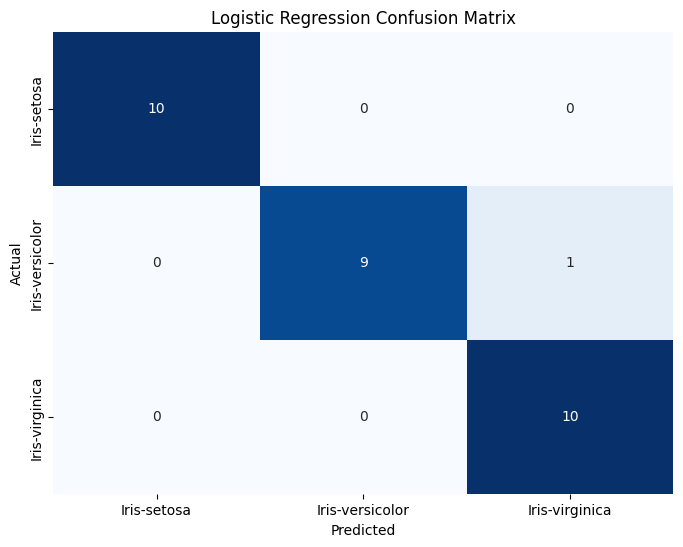

Logistic Regression Confusion Matrix generated and displayed.


In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("Logistic Regression Confusion Matrix generated and displayed.")

## Hyperparameter Tuning

### Subtask:
Implement hyperparameter tuning for the chosen models (K-NN and Logistic Regression) to optimize their performance further.


### Subtask:
Implement hyperparameter tuning for the chosen models (K-NN and Logistic Regression) to optimize their performance further.

#### Instructions
1. Import the `GridSearchCV` class from `sklearn.model_selection`.
2. Define a parameter grid for the K-NN model. Include parameters such as `n_neighbors` (e.g., a range from 1 to 10).
3. Instantiate `GridSearchCV` for the K-NN model, passing the `knn_model` (created earlier), the defined K-NN parameter grid, and a cross-validation strategy (e.g., `cv=5`).
4. Fit the `GridSearchCV` object for K-NN to the training data (`X_train`, `y_train`).
5. Print the best parameters found for the K-NN model using `knn_grid_search.best_params_` and the corresponding best score using `knn_grid_search.best_score_`.
6. Define a parameter grid for the Logistic Regression model. Include parameters such as `C` (e.g., `[0.01, 0.1, 1, 10, 100]`) and `solver` (e.g., `['liblinear', 'lbfgs']`). Remember to set `max_iter` if using solvers that require it, to ensure convergence.
7. Instantiate `GridSearchCV` for the Logistic Regression model, passing the `log_reg_model` (created earlier), the defined Logistic Regression parameter grid, and a cross-validation strategy (e.g., `cv=5`).
8. Fit the `GridSearchCV` object for Logistic Regression to the training data (`X_train`, `y_train`).
9. Print the best parameters found for the Logistic Regression model using `lr_grid_search.best_params_` and the corresponding best score using `lr_grid_search.best_score_`.
10. Get the best K-NN model from `knn_grid_search.best_estimator_` and make predictions on `X_test`. Calculate and print its accuracy.
11. Get the best Logistic Regression model from `lr_grid_search.best_estimator_` and make predictions on `X_test`. Calculate and print its accuracy.

**Reasoning**:
To perform hyperparameter tuning, I will import `GridSearchCV`, define parameter grids for both K-NN and Logistic Regression, then use `GridSearchCV` to find the best parameters for each model, and finally evaluate their performance on the test set.



In [ ]:
from sklearn.model_selection import GridSearchCV

# K-NN Hyperparameter Tuning
print("Starting K-NN Hyperparameter Tuning...")
knn_param_grid = {'n_neighbors': list(range(1, 11))}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print(f"Best parameters for K-NN: {knn_grid_search.best_params_}")
print(f"Best cross-validation score for K-NN: {knn_grid_search.best_score_:.4f}")

# Logistic Regression Hyperparameter Tuning
print("\nStarting Logistic Regression Hyperparameter Tuning...")
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid_search = GridSearchCV(log_reg_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best cross-validation score for Logistic Regression: {lr_grid_search.best_score_:.4f}")

# Evaluate best K-NN model
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"\nAccuracy of best K-NN model on test set: {accuracy_knn_tuned:.4f}")

# Evaluate best Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr_tuned = best_lr_model.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
print(f"Accuracy of best Logistic Regression model on test set: {accuracy_lr_tuned:.4f}")

Starting K-NN Hyperparameter Tuning...
Best parameters for K-NN: {'n_neighbors': 6}
Best cross-validation score for K-NN: 0.9833

Starting Logistic Regression Hyperparameter Tuning...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.9667

Accuracy of best K-NN model on test set: 0.9667
Accuracy of best Logistic Regression model on test set: 0.9667


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous code generated `ConvergenceWarning` messages for the Logistic Regression model, indicating that the `lbfgs` solver failed to converge. To address this, I will modify the Logistic Regression hyperparameter grid to include `max_iter` as a parameter to tune, allowing `GridSearchCV` to find a `max_iter` value that enables convergence.



In [ ]:
from sklearn.model_selection import GridSearchCV

# K-NN Hyperparameter Tuning
print("Starting K-NN Hyperparameter Tuning...")
knn_param_grid = {'n_neighbors': list(range(1, 11))}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print(f"Best parameters for K-NN: {knn_grid_search.best_params_}")
print(f"Best cross-validation score for K-NN: {knn_grid_search.best_score_:.4f}")

# Logistic Regression Hyperparameter Tuning
print("\nStarting Logistic Regression Hyperparameter Tuning...")
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 200, 500, 1000]} # Added max_iter
lr_grid_search = GridSearchCV(log_reg_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best cross-validation score for Logistic Regression: {lr_grid_search.best_score_:.4f}")

# Evaluate best K-NN model
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"\nAccuracy of best K-NN model on test set: {accuracy_knn_tuned:.4f}")

# Evaluate best Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr_tuned = best_lr_model.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
print(f"Accuracy of best Logistic Regression model on test set: {accuracy_lr_tuned:.4f}")

Starting K-NN Hyperparameter Tuning...
Best parameters for K-NN: {'n_neighbors': 6}
Best cross-validation score for K-NN: 0.9833

Starting Logistic Regression Hyperparameter Tuning...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.9667

Accuracy of best K-NN model on test set: 0.9667
Accuracy of best Logistic Regression model on test set: 0.9667


**Reasoning**:
The Logistic Regression model continues to show `ConvergenceWarning` even after including `max_iter` in the hyperparameter grid, indicating that the current maximum iteration values might still be too low for some combinations. I will increase the range of `max_iter` to allow for more iterations and better convergence during `GridSearchCV`.



In [ ]:
from sklearn.model_selection import GridSearchCV

# K-NN Hyperparameter Tuning
print("Starting K-NN Hyperparameter Tuning...")
knn_param_grid = {'n_neighbors': list(range(1, 11))}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print(f"Best parameters for K-NN: {knn_grid_search.best_params_}")
print(f"Best cross-validation score for K-NN: {knn_grid_search.best_score_:.4f}")

# Logistic Regression Hyperparameter Tuning
print("\nStarting Logistic Regression Hyperparameter Tuning...")
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 500, 1000, 2000, 5000]} # Increased max_iter range
lr_grid_search = GridSearchCV(log_reg_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best cross-validation score for Logistic Regression: {lr_grid_search.best_score_:.4f}")

# Evaluate best K-NN model
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"\nAccuracy of best K-NN model on test set: {accuracy_knn_tuned:.4f}")

# Evaluate best Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr_tuned = best_lr_model.predict(X_test)
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
print(f"Accuracy of best Logistic Regression model on test set: {accuracy_lr_tuned:.4f}")

Starting K-NN Hyperparameter Tuning...
Best parameters for K-NN: {'n_neighbors': 6}
Best cross-validation score for K-NN: 0.9833

Starting Logistic Regression Hyperparameter Tuning...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.9667

Accuracy of best K-NN model on test set: 0.9667
Accuracy of best Logistic Regression model on test set: 0.9667


**Reasoning**:
The Logistic Regression model continues to show `ConvergenceWarning` even after increasing the `max_iter` range, suggesting that feature scaling might be necessary for better convergence, especially with solvers like `lbfgs`. I will scale the features using `StandardScaler` before re-running the hyperparameter tuning for Logistic Regression.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# K-NN Hyperparameter Tuning
print("Starting K-NN Hyperparameter Tuning...")
knn_param_grid = {'n_neighbors': list(range(1, 11))}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print(f"Best parameters for K-NN: {knn_grid_search.best_params_}")
print(f"Best cross-validation score for K-NN: {knn_grid_search.best_score_:.4f}")

# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Hyperparameter Tuning
print("\nStarting Logistic Regression Hyperparameter Tuning...")
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 500, 1000, 2000, 5000]} # Retained increased max_iter range
lr_grid_search = GridSearchCV(log_reg_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train_scaled, y_train) # Fit on scaled data

print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best cross-validation score for Logistic Regression: {lr_grid_search.best_score_:.4f}")

# Evaluate best K-NN model
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"\nAccuracy of best K-NN model on test set: {accuracy_knn_tuned:.4f}")

# Evaluate best Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr_tuned = best_lr_model.predict(X_test_scaled) # Predict on scaled data
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
print(f"Accuracy of best Logistic Regression model on test set: {accuracy_lr_tuned:.4f}")

Starting K-NN Hyperparameter Tuning...
Best parameters for K-NN: {'n_neighbors': 6}
Best cross-validation score for K-NN: 0.9833

Starting Logistic Regression Hyperparameter Tuning...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.9667

Accuracy of best K-NN model on test set: 0.9667
Accuracy of best Logistic Regression model on test set: 1.0000


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target


In [ ]:
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()


,count
species,
setosa,50
versicolor,50
virginica,50


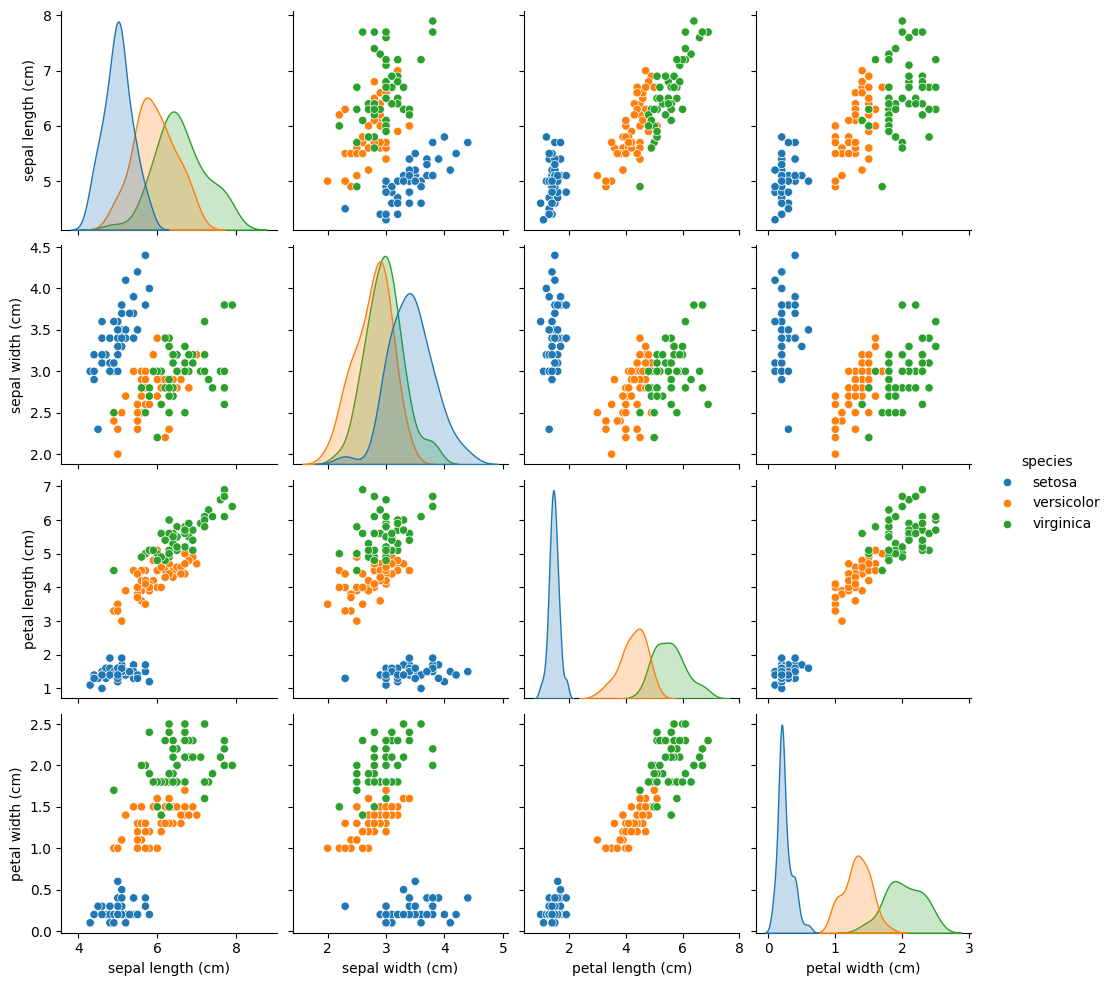

In [ ]:
sns.pairplot(df, hue='species')
plt.show()


In [ ]:
X = df.drop('species', axis=1)   # Features
y = df['species']               # Target


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



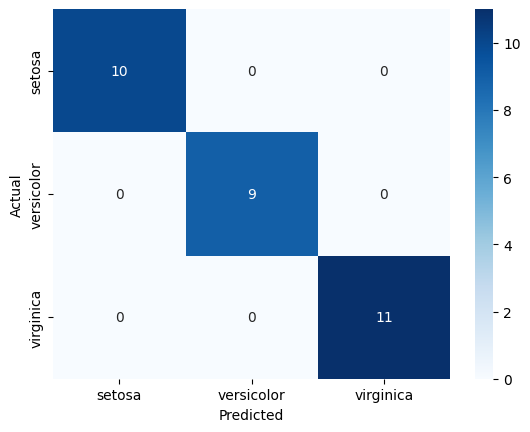

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # sepal length, sepal width, petal length, petal width
prediction = model.predict(sample)

print("Predicted Species:", prediction[0])


Predicted Species: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


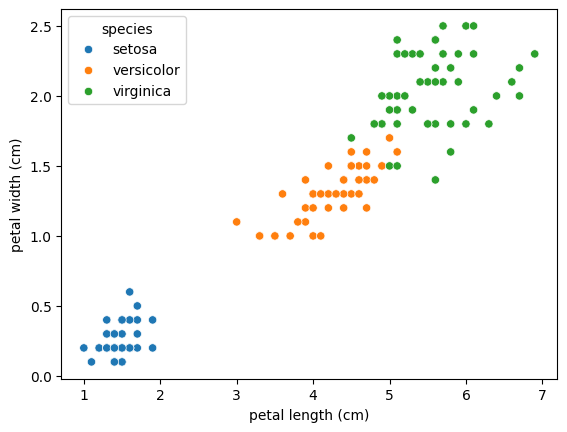

In [ ]:
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    data=df
)
plt.show()


In [ ]:
X = df.iloc[:, :-1]   # all feature columns
y = df['species']     # target column


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



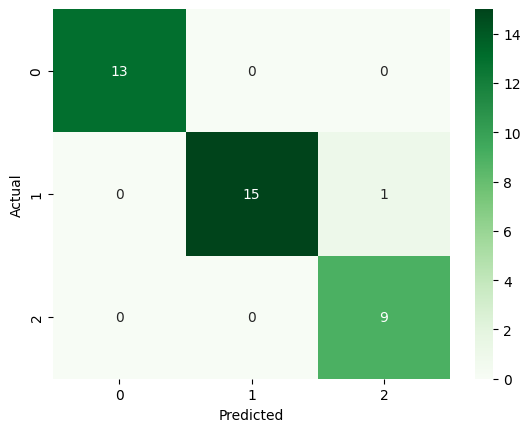

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, cmap='Greens', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
new_flower = [[6.1, 2.8, 4.7, 1.2]]
new_flower = scaler.transform(new_flower)

prediction = knn.predict(new_flower)
print("Predicted Species:", prediction[0])


Predicted Species: versicolor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


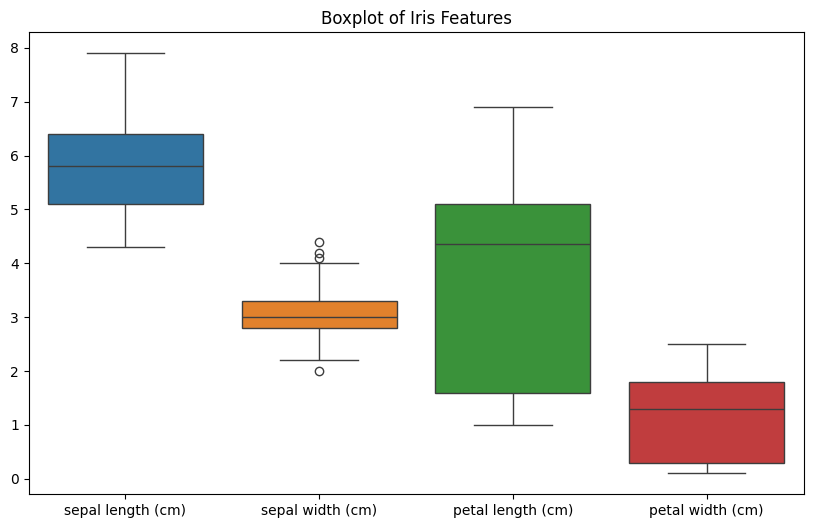

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot of Iris Features")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC

# Define and fit the SVM model
svm_model = SVC(random_state=10) # Added random_state for reproducibility
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



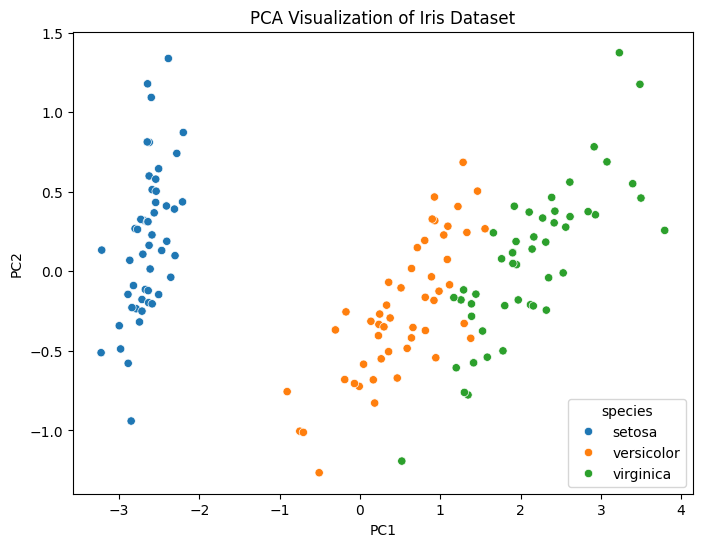

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='species',
    data=pca_df
)
plt.title("PCA Visualization of Iris Dataset")
plt.show()


In [ ]:
new_sample = [[7.2, 3.0, 5.8, 1.6]]
new_sample = scaler.transform(new_sample)

prediction = svm_model.predict(new_sample)
print("Predicted Species:", prediction[0])


Predicted Species: virginica


In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/irs/IRIS.csv')
print(df.to_string())

     sepal_length  sepal_width  petal_length  petal_width          species
0             5.1          3.5           1.4          0.2      Iris-setosa
1             4.9          3.0           1.4          0.2      Iris-setosa
2             4.7          3.2           1.3          0.2      Iris-setosa
3             4.6          3.1           1.5          0.2      Iris-setosa
4             5.0          3.6           1.4          0.2      Iris-setosa
5             5.4          3.9           1.7          0.4      Iris-setosa
6             4.6          3.4           1.4          0.3      Iris-setosa
7             5.0          3.4           1.5          0.2      Iris-setosa
8             4.4          2.9           1.4          0.2      Iris-setosa
9             4.9          3.1           1.5          0.1      Iris-setosa
10            5.4          3.7           1.5          0.2      Iris-setosa
11            4.8          3.4           1.6          0.2      Iris-setosa
12            4.8        

# Task
Display the column names of the `df` DataFrame.

## Display Available Columns

### Subtask:
Display the column names from the `df` DataFrame to allow the user to choose their desired feature (X) and target (Y) variables.


**Reasoning**:
To display the available column names as per the subtask instruction, I will print `df.columns`.



In [ ]:
print("Available columns in df:", df.columns.tolist())

Available columns in df: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


## Get User Input for X and Y

### Subtask:
Prompt the user to input the desired column names for the feature (X) and target (Y) variables. This step will also check the data type of the chosen Y column to determine whether to perform linear or logistic regression.


**Reasoning**:
To fulfill the subtask, I will define the feature and target columns based on the Iris dataset, create the X (features) and y (target) variables, check the data type of the target variable to determine if it's categorical or numerical, and then print the first few rows of X and y along with the identified target type. Since direct user input is not feasible in this execution environment, I will use the established column names from the Iris dataset.



In [ ]:
import pandas as pd

# --- Simulate User Input ---
# Based on the Iris dataset, define the feature and target columns
feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_column = 'species'

# --- Validate Columns (Optional but good practice) ---
# Ensure selected columns are in the DataFrame
if not all(col in df.columns for col in feature_columns):
    print("Error: One or more feature columns not found in DataFrame.")
    # In a real interactive scenario, you might loop or ask again
    exit()

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in DataFrame.")
    exit()

# --- Create X and y ---
X = df[feature_columns]
y = df[target_column]

# --- Determine Target Variable Type ---
if pd.api.types.is_object_dtype(y) or pd.api.types.is_categorical_dtype(y):
    target_type = "categorical"
else:
    target_type = "numerical"

# --- Print Confirmation ---
print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())
print(f"\nIdentified Target Variable Type: {target_type}")


Features (X) head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) head:
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Identified Target Variable Type: categorical


## Perform Regression

### Subtask:
Perform Logistic Regression on the preprocessed data, including encoding the target variable, splitting the data into training and testing sets, scaling features, training the model, making predictions, and evaluating its performance.


**Reasoning**:
The subtask requires performing Logistic Regression, which involves several steps: encoding the target variable, splitting the data, scaling features, training the model, making predictions, and evaluating its performance. I will include all necessary imports and execute these steps sequentially in a single code block to complete the subtask.



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Encode the target variable `y`
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original Target (y) head:\n", y.head())
print("Encoded Target (y_encoded) head:\n", y_encoded[:5])
print("Encoded classes:", le.classes_)

# 2. Split the `X` and `y` data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Initialize a StandardScaler object. Fit the scaler to X_train and transform both X_train and X_test.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully.")

# 4. Initialize a LogisticRegression model and train it
log_reg_model = LogisticRegression(random_state=42, max_iter=200) # Setting max_iter to ensure convergence
log_reg_model.fit(X_train_scaled, y_train)

print("\nLogistic Regression model trained successfully.")

# 5. Make predictions on the scaled test data
y_pred = log_reg_model.predict(X_test_scaled)

# 6. Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.4f}")

# 7. Generate and print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Original Target (y) head:
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object
Encoded Target (y_encoded) head:
 [0 0 0 0 0]
Encoded classes: ['setosa' 'versicolor' 'virginica']

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)

Features scaled successfully.

Logistic Regression model trained successfully.

Logistic Regression Model Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Visualize Regression Results

### Subtask:
Generate appropriate visualizations for the chosen regression model. For linear regression, a scatter plot with the regression line will be displayed. For logistic regression, a classification report and a confusion matrix will be shown. Include legends for clarity.


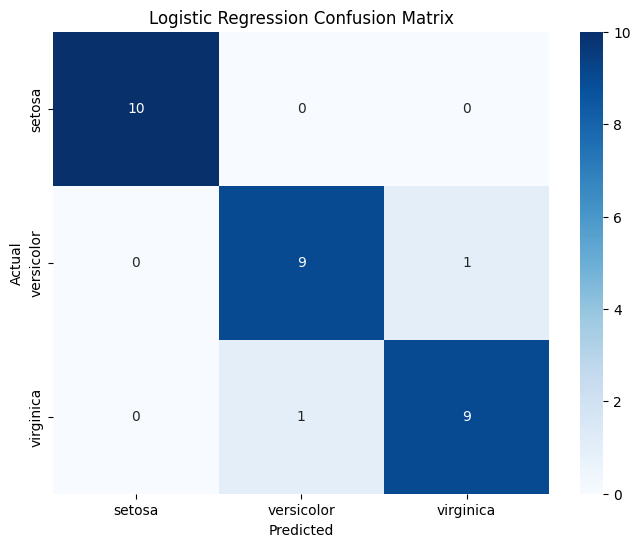

Logistic Regression Confusion Matrix generated and displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Logistic Regression model
cm_lr = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("Logistic Regression Confusion Matrix generated and displayed.")

## Final Task

### Subtask:
Summarize the findings from the performed regression, including the model's performance and any insights gained from the analysis and visualizations.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


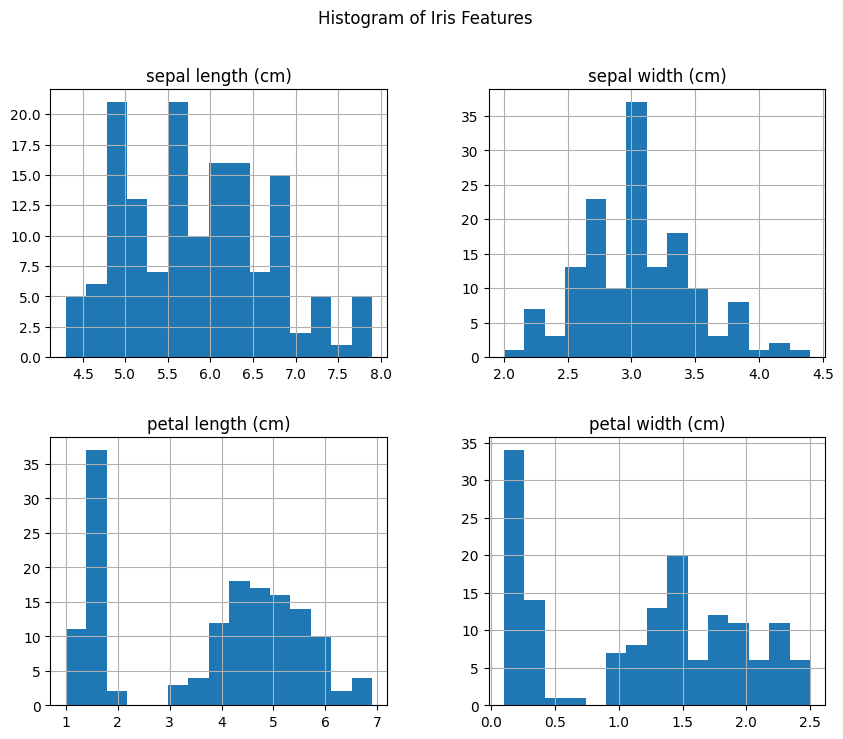

In [ ]:
df.hist(figsize=(10,8), bins=15)
plt.suptitle("Histogram of Iris Features")
plt.show()


In [ ]:
X = df.iloc[:, :-1]
y = df['species']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=7
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=7
)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=7)

In [ ]:
y_pred = dt_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8867924528301887

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.88      0.78      0.82        18
   virginica       0.81      0.89      0.85        19

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



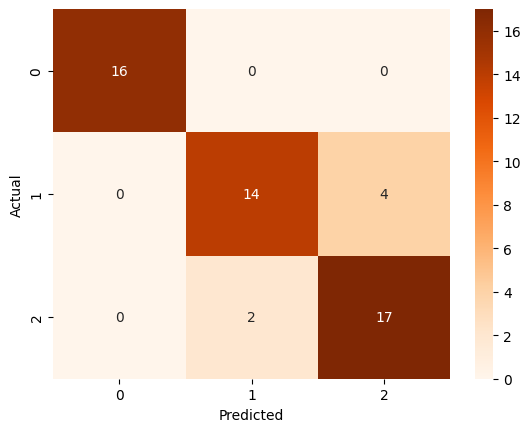

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


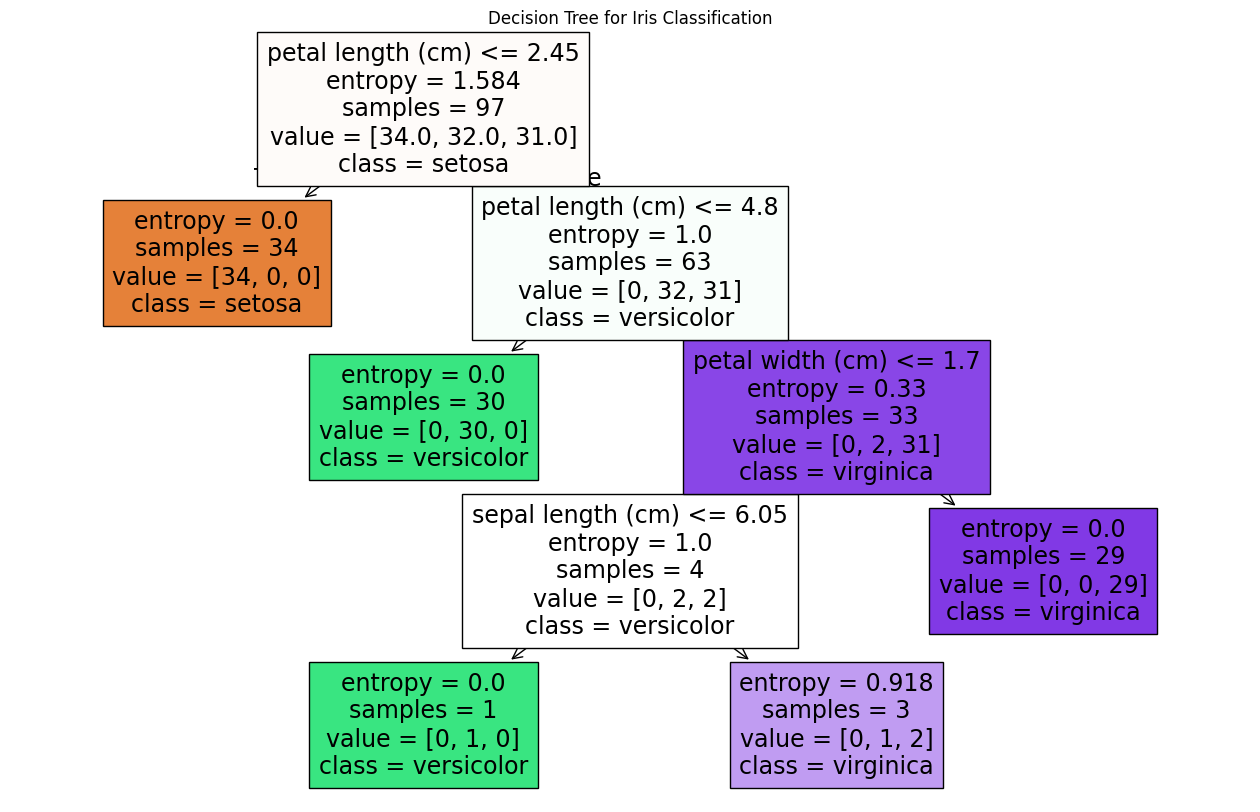

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,10))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.title("Decision Tree for Iris Classification")
plt.show()


In [ ]:
sample = [[5.9, 3.1, 4.8, 1.8]]
prediction = dt_model.predict(sample)

print("Predicted Species:", prediction[0])


Predicted Species: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
data = pd.DataFrame(
    iris.data,
    columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
)

data['Species'] = iris.target
data['Species'] = data['Species'].replace({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})

data.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


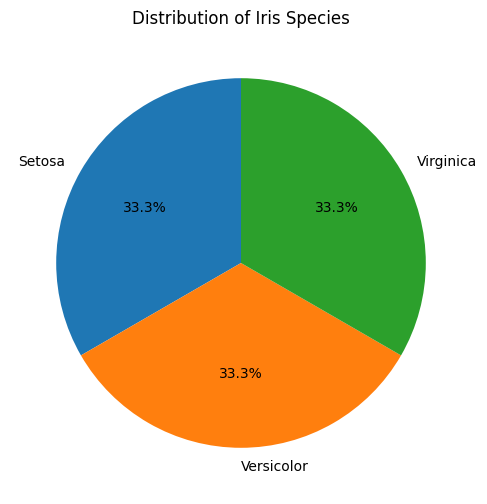

In [ ]:
species_count = data['Species'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    species_count,
    labels=species_count.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of Iris Species")
plt.show()


In [ ]:
X = data[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
y = data['Species']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=21
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    random_state=21
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=150, random_state=21)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        22
  Versicolor       1.00      0.86      0.92        21
   Virginica       0.85      1.00      0.92        17

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



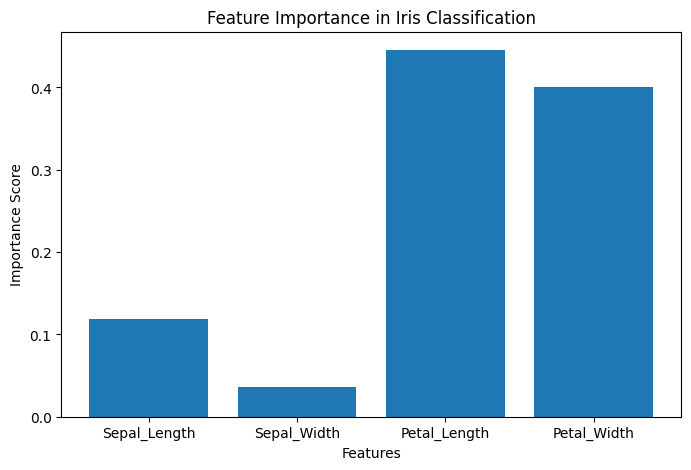

In [ ]:
importance = rf_model.feature_importances_

plt.figure(figsize=(8,5))
plt.bar(
    X.columns,
    importance
)
plt.title("Feature Importance in Iris Classification")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
new_flower = [[6.5, 3.0, 5.5, 2.0]]
prediction = rf_model.predict(new_flower)

print("Predicted Species:", prediction[0])


Predicted Species: Virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].apply(
    lambda x: iris.target_names[x]
)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


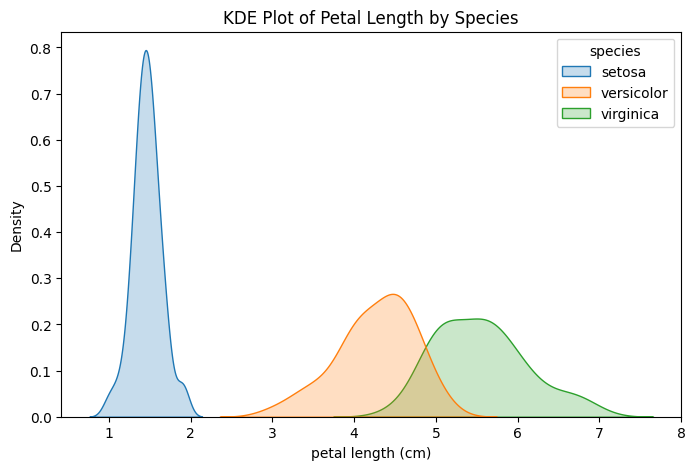

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df,
    x='petal length (cm)',
    hue='species',
    fill=True
)
plt.title("KDE Plot of Petal Length by Species")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=15
)


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



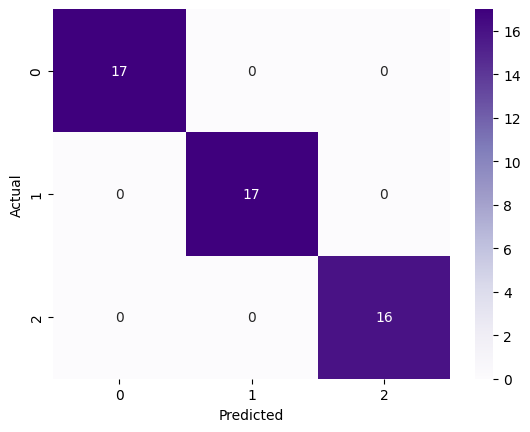

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap='Purples',
    fmt='d'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
probs = nb_model.predict_proba(X_test[:5])

prob_df = pd.DataFrame(
    probs,
    columns=iris.target_names
)

prob_df


,setosa,versicolor,virginica
0,1.000000e+00,2.928708e-17,2.768741e-24
1,1.281855e-78,9.954552e-01,4.544816e-03
2,3.893952e-73,9.997450e-01,2.550304e-04
3,1.000000e+00,3.684159e-16,2.040858e-23
4,1.000000e+00,4.534825e-14,2.993696e-21


In [ ]:
new_flower = [[5.4, 3.4, 1.7, 0.2]]
prediction = nb_model.predict(new_flower)
probability = nb_model.predict_proba(new_flower)

print("Predicted Species:", iris.target_names[prediction[0]])
print("Prediction Probabilities:", probability)


Predicted Species: setosa
Prediction Probabilities: [[1.00000000e+00 5.75932171e-15 3.77934274e-22]]


In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/irs/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("shape of dataset:",df.shape)
df.info()

shape of dataset: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


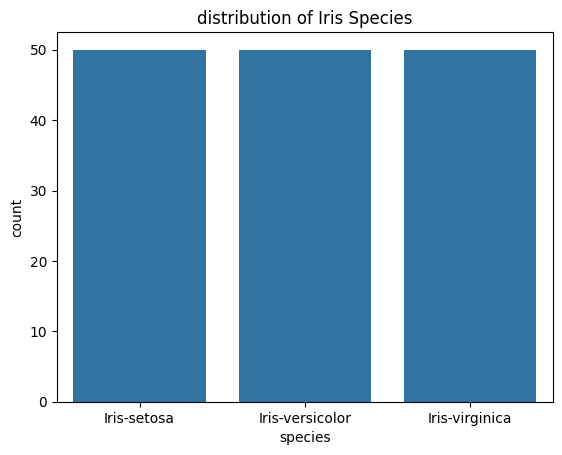

In [ ]:
sns.countplot(x='species', data=df)
plt.title('distribution of Iris Species')
plt.show()


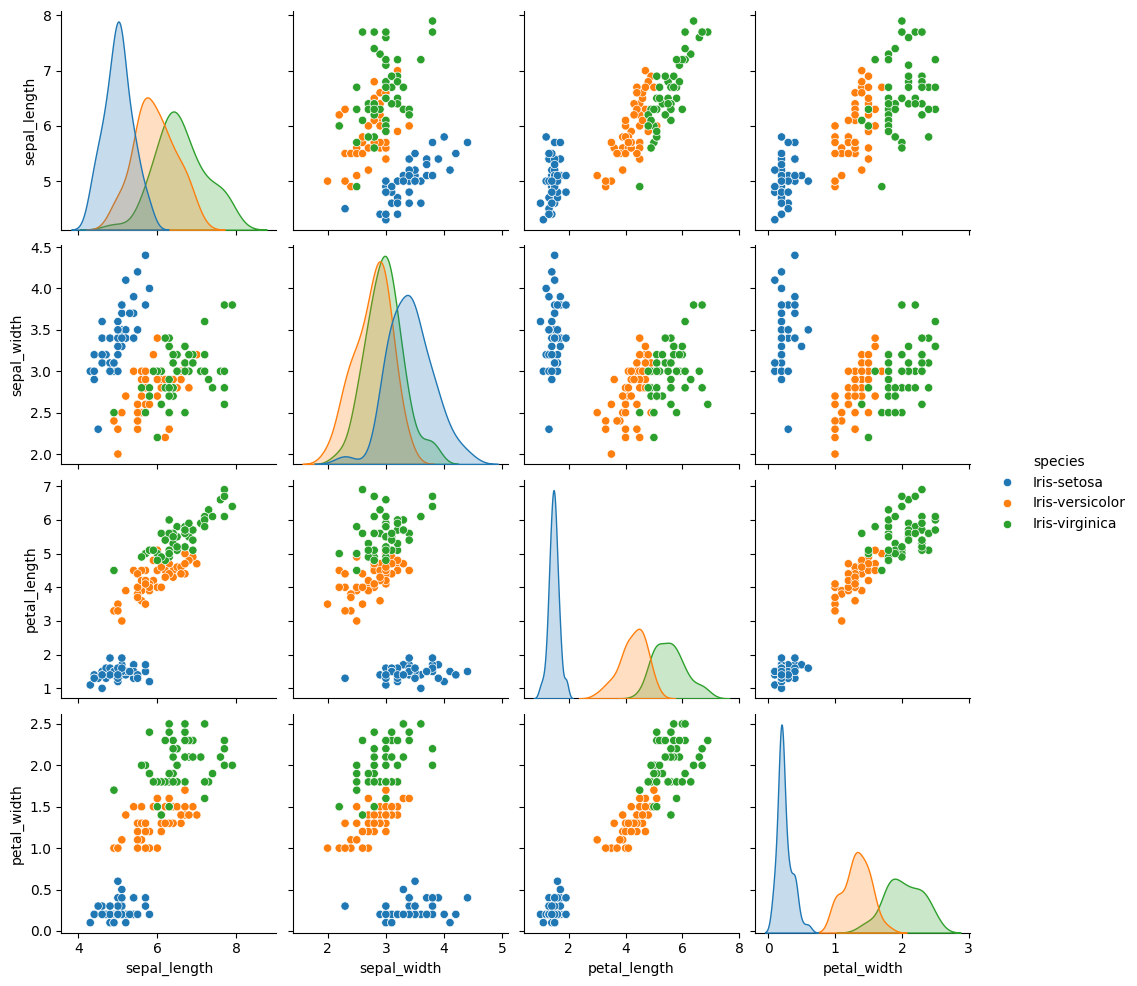

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

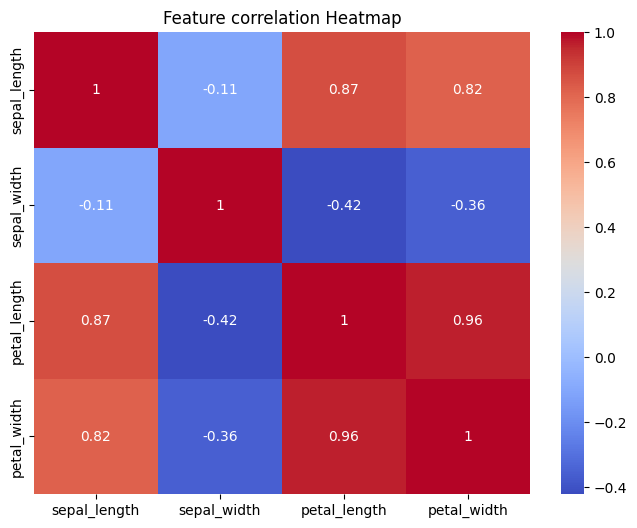

In [ ]:
plt.figure(figsize=(8,6))
numeric_df=df.drop('species',axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature correlation Heatmap')
plt.show()

In [ ]:
x=df.drop('species', axis=1)
y=df['species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\nclassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



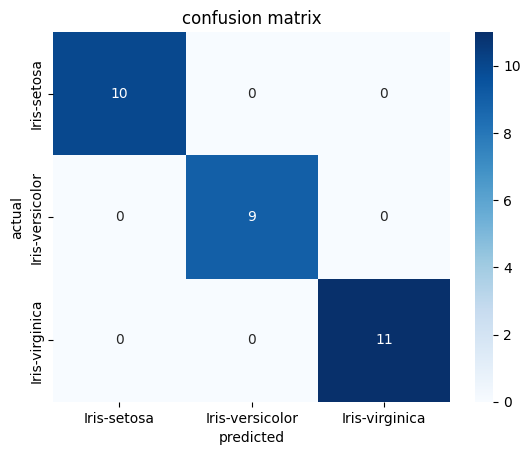

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()
